In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [118]:
dress=pd.read_csv('women.csv')
dress.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [119]:
dress.shape

(23486, 11)

In [120]:
dress.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [121]:
dress.dtypes                                              

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [122]:
#Uncomment if executing for first time
dress.drop(columns='Unnamed: 0',inplace=True)


In [123]:
#Selecting non-null values
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    dress = dress[dress[x].notnull()]
dress.shape

(22628, 10)

In [124]:
dress.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784
std,201.683804,12.328176,1.115911,0.385222,5.787520
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [125]:
#Creating new column Label for distinguishing betweeen positive adn negative ratings.
dress['label']=0
dress.loc[dress['Rating']>=3,['label']]=1
dress.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,label
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


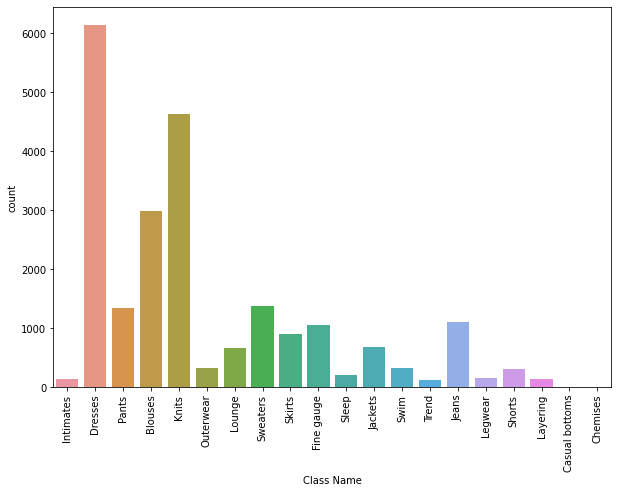

In [126]:
plt.figure(figsize=(10,7))
a=sns.countplot(dress['Class Name'])
b=a.set_xticklabels(a.get_xticklabels(),rotation=90)

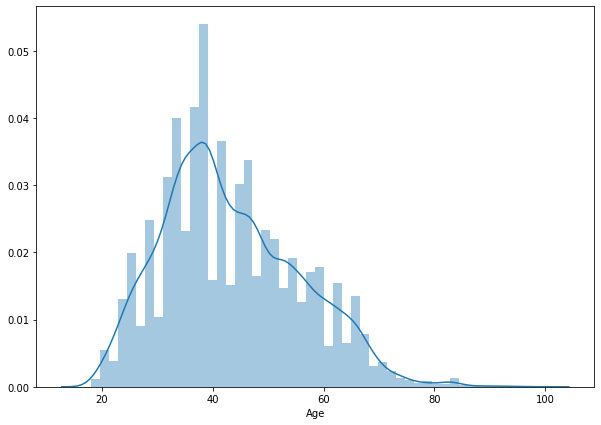

In [127]:
#Viewing continous distribution for Age
plt.figure(figsize=(10,7))
sns.distplot(dress['Age'])

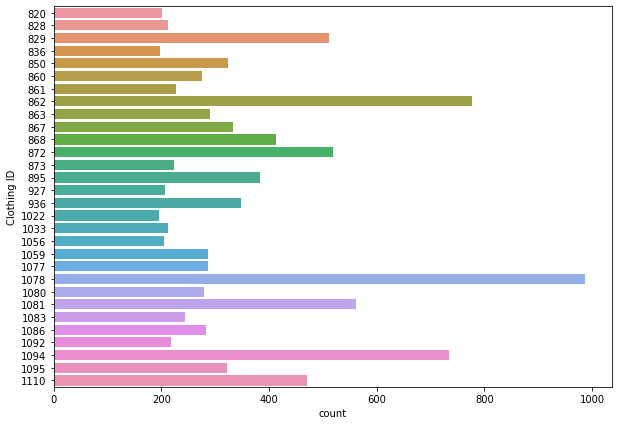

In [128]:
#plotting the number of Cloth IDs which has most counts(top 30 clothing IDs with most counts)
plt.figure(figsize=(10,7))
sns.countplot(y="Clothing ID", data = dress[dress["Clothing ID"].isin(dress["Clothing ID"].value_counts()[:30].index)])

### Visualizing Frequency plots 

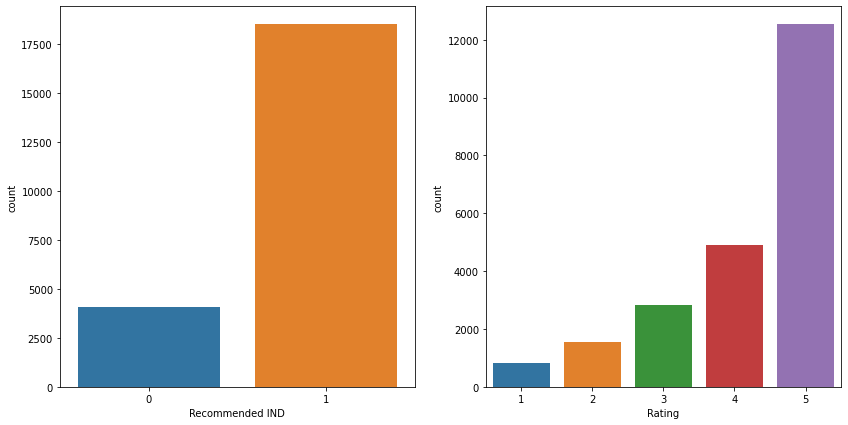

In [129]:
f, axes = plt.subplots(1,2, figsize=[14,7])
sns.countplot(dress['Rating'],ax=axes[1])
b=sns.countplot(dress['Recommended IND'],ax=axes[0])

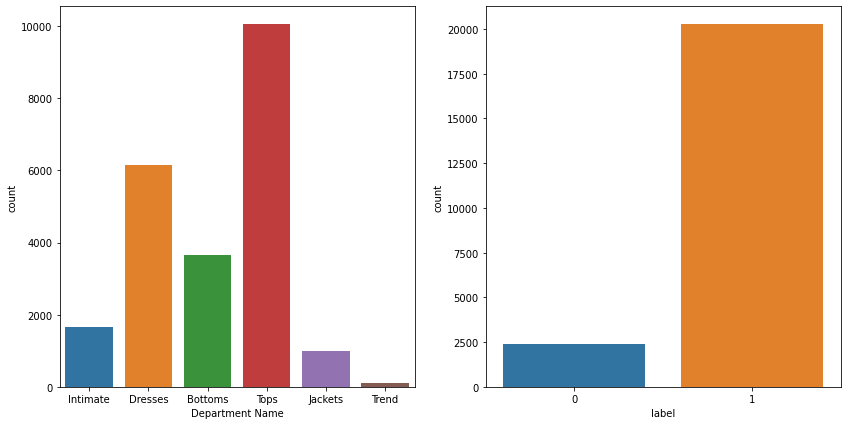

In [130]:
f, axes = plt.subplots(1,2, figsize=[14,7])
sns.countplot(dress['Department Name'],ax=axes[0])
sns.countplot(dress['label'],ax=axes[1])

## TEXT MINING

In [131]:
dress[["Title","Review Text", "Rating"]]

,Title,Review Text,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,NaN,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3
23483,"Cute, but see through","This fit well, but the top was very see throug...",3
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3


In [132]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import string as st


In [133]:
#Removing punctuations

def rem_punct(txt):
    txt=''.join([i.lower() for i in txt if i not in st.punctuation])
    return txt

dress['Clean']=dress['Review Text'].apply(lambda x:rem_punct(x))
dress.Clean

0        absolutely wonderful  silky and sexy and comfo...
1        love this dress  its sooo pretty  i happened t...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit its fun flirty ...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes soft stretc...
23483    this fit well but the top was very see through...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: Clean, Length: 22628, dtype: object

In [134]:
# Basic Text Operations (tokenizing,lemmatization)

stop=nltk.corpus.stopwords.words('english')
lemma=nltk.WordNetLemmatizer()

def operations(txt):
    txt=re.split('\W+',txt)
    txt=[i for i in txt if i not in stop ]
    txt=[lemma.lemmatize(i) for i in txt]
    #txt=[i for i in txt if i.isalpha()]
    #txt=[i for i in txt if len(i)>2]
    return txt

dress['Clean']=dress['Clean'].apply(lambda x:operations(x))


In [135]:
dress.Clean

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, worked, im...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Clean, Length: 22628, dtype: object

In [136]:

#Joining to form sentences
def joining(txt):
    txt=' '.join([i for i in txt])
    return txt

dress['Clean']=dress['Clean'].apply(lambda x:joining(x))

In [137]:
dress.Clean

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: Clean, Length: 22628, dtype: object

### MODEL BUILDING

In [138]:
# Using Tf-idf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfvect=TfidfVectorizer()


X=tfvect.fit_transform(dress['Clean'])
Y=dress['label']

In [145]:
data_nlp = dress[dress['Rating'] !=3]
data_nlp['Positively Rated'] = np.where(data_nlp['Rating'] > 3, 1,0)
pd.crosstab(data_nlp['Recommended IND'], data_nlp['Positively Rated'])

/home/dnyanesh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Positively Rated,0,1
Recommended IND,,
0,2261,187
1,109,17248


In [140]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

x_train,x_test,y_train,y_test=train_test_split(X,Y)

### KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(pred,y_test)

print('SCORE :',acc)

0.8997701962170762

### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=accuracy_score(pred,y_test)
print('SCORE :',acc)

SCORE : 0.9096694360968711


### Navie Bayes

In [168]:
from sklearn.naive_bayes import MultinomialNB
from nltk.classify import NaiveBayesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = KFold(n_splits=5, shuffle=True, random_state=0)

nb = MultinomialNB()
nb.fit(x_train,y_train)
pred= nb.predict(x_test)

score= cross_val_score(nb,x_train,y_train,cv=k,scoring='roc_auc')
print('SCORE:',np.mean(score))

SCORE: 0.8282011096104493


### SVC

In [170]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train, y_train) 
predictions = clf.predict(x_test)
result= cross_val_score(clf,x_train, y_train,cv=k,scoring='roc_auc')
print(result.mean())

0.894155692458259


### CONCLUSION
#### Applied Logistic Regression, KNN, Naive Bayes and SVC for modelling, with 90% accuracy 